# OSEMN Exercises

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import numpy.random as npr
import random

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [22]:
# we can for example create a list of random numbers in the range(1,101) and putting them into a txt file 
datafile = open("simple_data.txt","w+")
# Here, we used "w" letter in our argument, which indicates write and will create a file if it does not exist in library.Plus sign indicates both read and write
for i in range(100) :
    datafile.write(str(random.randint(0,100))) 
datafile.close()

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [4]:
npr.seed(145)
rmatrix = npr.randint(100,size = (5,5)) # a matrix of random integers from 0 to 100 5x5 of shape
with open("data.txt","w+") as datafile :
    np.savetxt("data.txt", rmatrix, fmt='%i',delimiter=' ')
    datafile.close()
# without iterating on rows the numpy method savetxt saves the entire matrix into the txt file with the format we choose in fmt and with the delimiter of coloumns in delimiter=''

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [362]:
import csv 
with open("data.txt","r") as dataload, open("data1.csv","w") as dataout : 
    for row in dataload :
        dataout.write(row.replace(' ',',')) 
# in questo modo ho scritto direttamente tramite il metodo write non nella libreria csv

with open("data.txt","r") as dataload, open("data.csv","w", newline = "") as dataout :
# quando apro un file csv il delimiter è uno solo ed è la virgola di base quindi devo specificare cosa deve interpretare quando vede il newline come carattere (in questo caso non deve fare niente) 
    writer = csv.writer(dataout, delimiter = ",") 
# specifico quale sarà il delimiter quando scriverò sul file csv (nel txt ogni numero è separato dal successivo con uno spazio) altrimenti scrive tutti i caratteri ognuno come stringa.
    for row in dataload :
        row = row.split() 
# Il metodo split si applica sulle stringhe e restituisce una lista di stringhe separate in base a ciò che è specificato come argomento. Usando un separatore che non esiste nella stringa lui la restituisce così come era in partenza (ad esempio un punto). Di norma il separator è il whitespace che comprende sia lo spazio che il \n che \t. Senxa specificare alcun argomento quindi lui interpreta, in questo caso, sia lo spazio (che separa qui ogni carattere) sia il newline (che è posto alla fine di ciascuna riga) come separatore. Usando .split(" ") invece viene escluso il newline che dunque è inserito comunque alla fine di ogni riga. Il delimiter presente come argomento in open csv trascura unicamente uno dei newline presenti in ogni riga, ogni volta infatti che printiamo la funzione ritorna un newline ma anche quando usiamo writerow. Quindi sono presenti il newline di base nel file dataload e quello messo da writerow pertanto tramite .split() togliamo quello alla fine di ciascuna riga e tramite il delimiter " newline = "" " trascuriamo il secondo.
        # print(row)
        writer.writerow(row)

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [65]:
with open("credit_card.dat","rb") as creditfile : # dovrei leggere qualsiasi riga come un numero dalla quartultima posizione perchè è indicato esplicitamente che gli ultimi quattro bit sono per riempimento
    sizecharacter = 6
    padding = 4
    creditnum = ""
    for row in creditfile :
        row = row.strip() # il new line è un carattere in meno
        numcharacters = int((len(row)-padding)/sizecharacter) # in questo modo dovremmo ottenere 19 caratteri per ciascuna carta compresi gli spazi 
        # itero sul numero dei caratteri e per ciascuno casto a char i sei che trovo davanti 
        for i in range(numcharacters) :
            creditnum += chr(int(row[sizecharacter*i : sizecharacter*(i+1)],2))
        creditnum += "\n"
    print("credit card number are:")
    print(creditnum)

credit card number are:
7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117
8140 1210 6352 2845
5764 1133 7301 7100
6456 1737 4126 6726
1228 8631 7382 0000
7051 0160 5374 3166
0618 3587 1630 6376
1545 5454 7444 5636
6735 3116 3202 6834
7287 5011 1547 8413
7033 2607 3328 4200
2568 5244 1874 5024
1684 2253 7570 7118
0672 2576 0575 6631
6332 8353 8787 1340
1813 3361 1175 4211
2477 6450 8840 2368
5512 3505 2563 1326
3083 7882 0621 0025
4521 5148 8045 0334
7563 3654 8713 5787
8324 2664 0476 5561
0565 2504 7168 3510
5107 5507 1767 0738
2462 1821 2448 1443
2788 0638 6861 6554
5851 5873 5474 0547
0670 1004 4013 2655
5874 5506 3048 0806
2805 5401 8462 1260
5083 8406 6310 1862
1076 1445 3013 2266
8440 4804 4844 5277
4758 6141 0686 1387
7586 0675 0315 2568
2544 1258 7432 5165
3474 5023 4434 5626
1410 0270 0434 5086
7315 4446 1104 4215
0224 7742 8300 0266
0170 2700 3145 0640
2006 2437 8054 1600
8142 4055 1776 0

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [355]:
import json as js
import csv 

with open("user_data.json","r") as readfile, open("user_data.csv","w", newline="") as outcsv :
    user_data = js.load(readfile) # otteniamo una lista di dizionari ciascuno per ogni utente. Per ognuno di questi devo confrontare il valore corrispondente alla chiave "CreditCardType" con "American Express", quindi salvare i dati ottenuti in un file csv 
    writer = csv.writer(outcsv, delimiter=",")
    writer.writerow(dic.keys())
    for dic in user_data :
        if dic["CreditCardType"] == "American Express" :
            writer.writerow(dic.values())

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

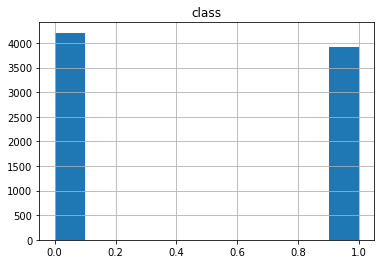

In [393]:
import pandas as pd
# usiamo pandas per importare il .csv. Intanto scarico il file dall'url indicato direttamente sulla directory in cui mi trovo
#!curl -O  mushrooms.csv https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1
#with open("mushrooms_categorized.csv","w", newline="") as mushfile :
opencsv = open("mushrooms_categorized.csv","r", newline="") # come al solito ottengo il filehandle in csv
readcsv = pd.read_csv("mushrooms_categorized.csv") # in questo modo leggo il file memorizzato nella repository corrente chiamato "mushrooms_categorized.csv"
# readcsv.head() # con head esploro le prime cinque righe del file

# anzichè aprire il file csv posso direttamente leggere tramite pandas attraverso l'url dove si trova il file
readmush = pd.read_csv(r"https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1")
display(readmush) # ottengo lo stesso risultato di prima ma il file non viene salvato in remoto
# infine rappresento un istogramma della classe "class". Posso richiamare una delle colonne del file csv semplicemente come readmush("classe") dove comunque la prima colonna rimane un indice di quanti dati ci siano in totale per ciascuna classe
readmush.hist("class")

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-328.100239,-1.820929,1.358539,-2.494838,0.828299,0.199255,0.142303,-0.582563,0.472356,-1.411304,...,-1.062502,2.299985,-0.085065,0.357165,-1.400150,-0.976176,-0.796009,-0.148662,0.978054,-0.804272
1996,-62.960036,-0.883712,-0.063687,-0.418704,-0.872601,0.363769,-0.368570,-0.104321,-2.493615,-1.694770,...,-0.197659,-0.533637,-0.598431,-0.039737,1.882953,-1.837356,0.583887,0.603931,-0.356482,0.029355
1997,-90.262252,-0.021394,-0.312864,-0.730848,-1.341482,-0.720862,-0.683872,-0.805370,-0.521334,-0.074645,...,1.899276,0.417949,0.324229,0.448252,-0.282110,-2.320763,1.484126,0.392324,-1.116838,-0.459027
1998,-74.333901,-0.041909,-0.862731,-1.232011,1.268843,0.093043,1.684069,0.753851,-0.537096,-0.971790,...,1.401321,-0.933149,-0.166864,1.152448,1.605114,-1.339651,0.105628,0.676177,-0.035598,-1.329490


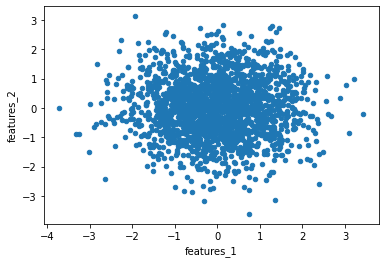

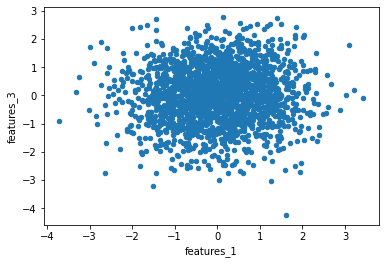

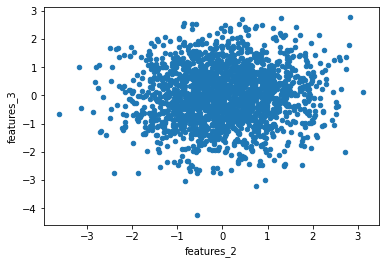

In [403]:
import pandas as pd
import itertools
regressionread = pd.read_csv(r"https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1")
display(regressionread)
pltdata = ["features_1","features_2","features_3"] 
pltlist = list(itertools.combinations(pltdata,2)) # itertools.combinations crea nua lista di tutte le possibili combinazioni di elementi presenti nella lista pltdata a coppie
for i in pltlist :
    regressionread.plot.scatter(*i) # per unpack le variabili da dare come argomento a plot.scatter (x,y)

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [2]:
import pandas as pd
import json as js

readmush = pd.read_csv(r"https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1", delimiter=",")
s = readmush.to_json() # questa è la stringa ottenuta dalla traduzione del file csv a json 
dictio = js.loads(s) # successivamente è necessario trasformare tale stringa al nativo oggetto python corrispondente a json cioè il dizionario
mushjs = js.dumps(dictio, indent = 4) # infine il metodo js.dumps mette in mushjs il dizionario con indentazione 4 spazi come stringa. Alla fine infatti verranno scritti nel file json tante stringhe con formattazione simile a quella dei dizionari 
with open("mushrooms_categorized.json","w") as jsfile :
    jsfile.write(mushjs)

<class 'str'>
